In [66]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt



%pylab inline
df = pd.read_csv('fake_news.csv')

In [68]:
df.shape

(1967, 4)

In [69]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [70]:
df = df.set_index('Unnamed: 0')

In [71]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [72]:


X = df["text"]
y = df["label"]


vectorizer = CountVectorizer()

vectorizer.fit(X)
transformed = vectorizer.transform(X)
transformed


<1967x48683 sparse matrix of type '<class 'numpy.int64'>'
	with 692360 stored elements in Compressed Sparse Row format>

In [73]:

vectorizer.vocabulary_

{'daniel': 10730,
 'greenfield': 18034,
 'shillman': 36763,
 'journalism': 22325,
 'fellow': 15723,
 'at': 3761,
 'the': 40568,
 'freedom': 16732,
 'center': 7466,
 'is': 21752,
 'new': 27704,
 'york': 45191,
 'writer': 44957,
 'focusing': 16342,
 'on': 28690,
 'radical': 32712,
 'islam': 21779,
 'in': 20520,
 'final': 15929,
 'stretch': 38998,
 'of': 28521,
 'election': 13723,
 'hillary': 19323,
 'rodham': 34900,
 'clinton': 8339,
 'has': 18768,
 'gone': 17762,
 'to': 41046,
 'war': 43915,
 'with': 44659,
 'fbi': 15612,
 'word': 44809,
 'œunprecedentedâ': 48460,
 'been': 4821,
 'thrown': 40841,
 'around': 3423,
 'so': 37709,
 'often': 28584,
 'this': 40738,
 'that': 40561,
 'it': 21840,
 'ought': 29039,
 'be': 4727,
 'retired': 34394,
 'but': 6659,
 'itâ': 21875,
 'still': 38778,
 'unprecedented': 42681,
 'for': 16422,
 'nominee': 27968,
 'major': 24880,
 'political': 31052,
 'party': 29770,
 'go': 17690,
 'thatâ': 40565,
 'exactly': 14810,
 'what': 44305,
 'and': 2745,
 'her': 19140,

In [74]:
labels = y == "REAL"
labels = labels.astype(int)
labels

Unnamed: 0
8476     0
10294    0
3608     1
10142    0
875      1
6903     0
7341     0
95       1
4869     1
2909     1
1357     1
988      1
7041     0
7623     0
1571     1
4739     1
7737     0
8716     0
3304     1
3078     1
2517     1
10348    0
778      1
3300     1
6155     0
636      1
755      1
626      1
691      1
5743     0
        ..
1231     1
3715     1
9682     0
2835     1
7525     0
7086     0
7430     0
5467     0
3933     1
10089    0
4144     1
5464     0
9143     0
4038     1
4608     1
9126     0
3501     1
4544     1
7161     0
671      1
5121     1
60       1
7348     0
5587     0
10205    0
3500     1
6993     0
6489     0
1892     1
405      1
Name: label, Length: 1967, dtype: int32

In [75]:
### Run your classifier



X_train, X_test, y_train, y_test = train_test_split(transformed,labels, test_size=0.3, random_state=24)

clf= SVC(kernel="linear")
clf.fit(X_train, y_train)
preds = clf.predict(X_test)


(preds == y_test).sum()/len(y_test)




0.8426395939086294

In [76]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train.todense(), y_train)
preds = clf.predict(X_test.todense())


(preds == y_test).sum()/len(y_test)



0.7935702199661591

In [77]:

### TF-IDF



tfidf = TfidfVectorizer()
transformed = tfidf.fit_transform(X)
transformed

<1967x48683 sparse matrix of type '<class 'numpy.float64'>'
	with 692360 stored elements in Compressed Sparse Row format>

In [78]:
X_train, X_test, y_train, y_test = train_test_split(transformed,labels, test_size=0.3, random_state=24)



clf= SVC(kernel="linear")
clf.fit(X_train, y_train)
preds = clf.predict(X_test)


(preds == y_test).sum()/len(y_test)

0.9069373942470389

In [79]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf,transformed, labels, cv=5).mean()

0.9008498986063213

In [80]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf,X_train, y_train, cv=5).mean()

0.8858728253656848

In [81]:
X_train.shape

(1376, 48683)

In [82]:
1767-1376


391

In [83]:
y = df.label

In [84]:
df = df.drop('label', axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [86]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [87]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [88]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [89]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [90]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [91]:
print(count_df.equals(tfidf_df))

False


In [92]:
count_df.head()

,00,000,0000,000ft,000km,001,003,005s,009,00p,...,œzap,œzero,œzorats,œâ,ševen,šin,šthe,šâ,žrepublicans,žthey
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
tfidf_df.head()

,00,000,0000,000ft,000km,001,003,005s,009,00p,...,œzap,œzero,œzorats,œâ,ševen,šin,šthe,šâ,žrepublicans,žthey
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.020334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.013800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [95]:
clf = MultinomialNB() 

accuracy:   0.829
Confusion matrix, without normalization


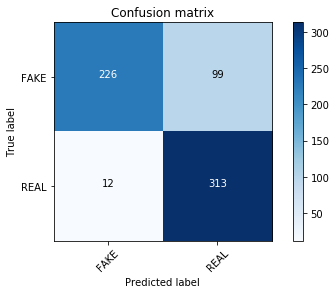

In [96]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [97]:
clf = MultinomialNB()

accuracy:   0.855
Confusion matrix, without normalization


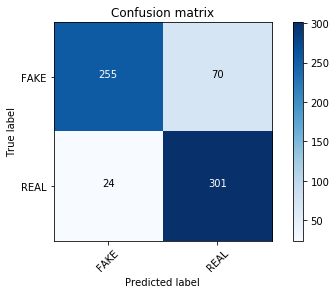

In [98]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [99]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.908
Confusion matrix, without normalization


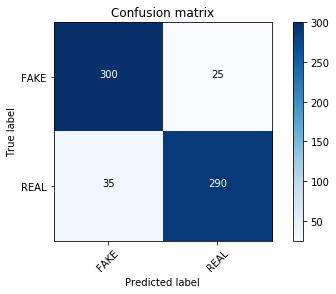

In [100]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [101]:
clf = MultinomialNB(alpha=0.1)

In [102]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.85385
Alpha: 0.10 Score: 0.86615
Alpha: 0.20 Score: 0.85077
Alpha: 0.30 Score: 0.84615
Alpha: 0.40 Score: 0.84308
Alpha: 0.50 Score: 0.84308
Alpha: 0.60 Score: 0.84154
Alpha: 0.70 Score: 0.84000
Alpha: 0.80 Score: 0.83538
Alpha: 0.90 Score: 0.83231


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [103]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -3.2877776686986206 2016
FAKE -2.803091880135544 hillary
FAKE -2.6873346782946683 october
FAKE -2.5782681126606093 election
FAKE -1.7603983665712843 article
FAKE -1.594456565520942 war
FAKE -1.5940495782003452 food
FAKE -1.5868160492186891 com
FAKE -1.4418175527129953 source
FAKE -1.3928939226380477 video
FAKE -1.3535669413293698 russia
FAKE -1.2703183742137087 jewish
FAKE -1.2457725672610969 november
FAKE -1.2216432830397126 muslim
FAKE -1.1936902402263931 share
FAKE -1.1604957813373402 wikileaks
FAKE -1.1602158072116955 27
FAKE -1.1469533995964976 dr
FAKE -1.1461963935167232 mosul
FAKE -1.123538663238825 donald
FAKE -1.0764912714312456 podesta
FAKE -1.073485836031223 voting
FAKE -1.0633497025922747 corruption
FAKE -1.0620278185367957 duke
FAKE -1.0571674188834825 16
FAKE -1.0524019904803248 film
FAKE -1.049080151328702 suppression
FAKE -1.045784318251934 aleppo
FAKE -1.040112700111149 oct
FAKE -1.0304837033554786 fbi

REAL 3.9095583532799636 said
REAL 2.145675419262662 state
REA

In [104]:
feature_names = tfidf_vectorizer.get_feature_names()

In [105]:
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.886499264137386, 'trump'),
 (-7.159708526026911, 'said'),
 (-7.289184768206521, 'clinton'),
 (-7.716942717726573, 'obama'),
 (-7.757387258298974, 'sanders'),
 (-7.768286929012504, 'campaign'),
 (-7.872828276550555, 'president'),
 (-7.888623102556119, 'state'),
 (-7.9523707386498526, 'republican'),
 (-7.964412044418539, 'cruz'),
 (-7.968951138246277, 'new'),
 (-8.017195563574264, 'party'),
 (-8.134924130583132, 'people'),
 (-8.17514021096191, 'percent'),
 (-8.183349577886181, 'voters'),
 (-8.226878400605415, 'house'),
 (-8.22741344597015, 'republicans'),
 (-8.240261695639125, 'democratic'),
 (-8.252274888063923, 'states'),
 (-8.277970167162778, 'presidential')]

In [106]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-10.804265585942732, '000km'),
 (-10.804265585942732, '005s'),
 (-10.804265585942732, '00p'),
 (-10.804265585942732, '00pm'),
 (-10.804265585942732, '013c2812c9'),
 (-10.804265585942732, '03'),
 (-10.804265585942732, '030'),
 (-10.804265585942732, '031'),
 (-10.804265585942732, '032'),
 (-10.804265585942732, '0325'),
 (-10.804265585942732, '033'),
 (-10.804265585942732, '039'),
 (-10.804265585942732, '04pm'),
 (-10.804265585942732, '053'),
 (-10.804265585942732, '06'),
 (-10.804265585942732, '06pm'),
 (-10.804265585942732, '07dryempjx'),
 (-10.804265585942732, '08'),
 (-10.804265585942732, '081'),
 (-10.804265585942732, '084')]

In [107]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [108]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [109]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.892
Confusion matrix, without normalization


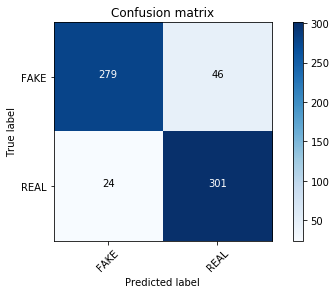

In [110]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [111]:
clf = PassiveAggressiveClassifier(n_iter=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.905
Confusion matrix, without normalization


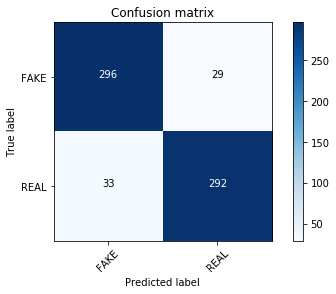

In [112]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])